In [32]:
import pandas as pd
import numpy as np
data = pd.read_csv("googleplaystore.csv")


In [2]:
data.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
def rule_based_labeling(row):
    if row["Rating"] >= 4:
        return "High"
    elif 2 < row['Rating'] < 4:
        return 'Medium'
    else:
        return "Low"


In [4]:
data["Rating_Cat"] = data.apply(rule_based_labeling, axis=1)


In [5]:
data.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Rating_Cat  
0  4.0.3 and up       High  
1  4.0.3 and up     Medium  
2  4.0.3 and up       High  
3    4.2 and up       High  
4    4.4 and up       High

<Axes: >

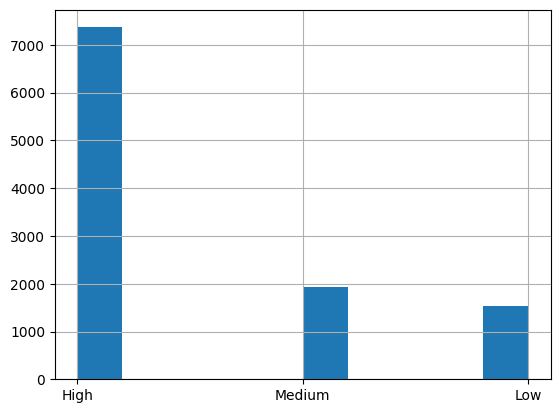

In [6]:
data["Rating_Cat"].hist()


In [ ]:
#############################################


Разметка подмножества данных с помощью Label Studio

In [7]:
data = pd.read_csv("tweets.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")


In [9]:
data


id             user_name              user_location  \
0      1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1      1338158543359250433           Albert Fong          San Francisco, CA   
2      1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3      1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4      1337854064604966912  Citizen News Channel                        NaN   
...                    ...                   ...                        ...   
11015  1460932683630977025                theSun              Petaling Jaya   
11016  1460809350792896516                 Sujan                        NaN   
11017  1460581918295031809                theSun              Petaling Jaya   
11018  1460344277951782922      Aleksejs Jackovs                    Ireland   
11019  1460208097956225028                theSun              Petaling Jaya   

                                        user_description         user_created  \
0      Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1      Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                         heil, hydra 🖐☺  2020-06-25 23:30:28   
3      Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4      Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
...                                                  ...                  ...   
11015  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11016  ________________________ •Napricorn• •It's jus...  2013-01-28 11:48:20   
11017  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11018  #Scientificresearcher in #InformationTechnolog...  2012-08-13 13:47:03   
11019  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   

       user_followers  user_friends  user_favourites  user_verified  \
0                 405          1692             3247          False   
1                 834           666              178          False   
2                  10            88              155          False   
3               49165          3933            21853           True   
4                 152           580             1473          False   
...               ...           ...              ...            ...   
11015          151937           465              593          False   
11016            4259           622           156941          False   
11017          151937           465              593          False   
11018               1            38               99          False   
11019          151937           465              593          False   

                      date                                               text  \
0      2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1      2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2      2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3      2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4      2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
...                    ...                                                ...   
11015  2021-11-17 11:27:49  The number of Covid-19 cases today, 17 Novembe...   
11016  2021-11-17 03:17:44                      First dose ✅\n#PfizerBioNTech   
11017  2021-11-16 12:14:00  The number of Covid-19 cases today, 16 Novembe...   
11018  2021-11-15 20:29:42  #PfizerBioNTech has developed new pill #Paxlov...   
11019  2021-11-15 11:28:34  The number of Covid-19 cases today, 15 Novembe...   

                                                hashtags               source  \
0                                     ['PfizerBioNTech']  Twitter for Android   
1                                                    NaN      Twitter Web App   
2      ['coronavirus', 'SputnikV'

In [11]:
subset = data.sample(frac=0.1)


In [12]:
subset


id                          user_name  \
3552  1349725660105695232  Jacqueline Pullos, COMT, OSC, CTC   
9199  1417413418609528850                        Trisha Seña   
7743  1380970817668923397                         Kim Garner   
1383  1341452097196322816               NesreenBakheit نسرين   
7704  1379455780705959940                            sir Sam   
...                   ...                                ...   
3159  1348757052177444870               Simon Hodes ⬅️2m➡️ 😷   
9439  1421206515873161222                        humanisator   
2076  1344976702246686722               🕷Financial Bear 3.5%   
5723  1362260918961401865           HPV Vaccine Side Effects   
2739  1347293561797058560                             Sherry   

                user_location  \
3552       Salt Lake City, UT   
9199  Quezon City,Philippines   
7743              Houston, TX   
1383                      UAE   
7704                      NaN   
...                       ...   
3159     GP Partner, Watford    
9439                 Le Monde   
2076     #KeepFightingMichael   
5723                      NaN   
2739                   Canada   

                                       user_description         user_created  \
3552  Ophthalmic Technologist/Educator: Moran Eye Ce...  2009-06-15 15:46:06   
9199               Fall seven times. Stand up eight. 💯💪  2012-06-04 07:30:09   
7743  Jesus lover. Preschool Teacher. Slightly obses...  2013-03-11 00:29:05   
1383  Gulf Correspondent \n\nSudanese/British\n\n☕️ ...  2019-12-16 19:38:20   
7704                                       6’5” sweetie  2021-01-13 04:31:16   
...                                                 ...                  ...   
3159  #Chronoptimist • NHS Dr 1996 GP Partner 2001 •...  2014-07-28 13:32:12   
9439  #liberté #dataanalyste #artlover #ingenieur #i...  2021-07-21 10:53:52   
2076  Pro the EU for the opportunities it offers cit...  2012-03-10 08:03:36   
5723  Try to educate, clarify & research about vacci...  2019-11-13 15:59:43   
2739  Leave this world a little better than you foun...  2009-07-15 15:40:50   

      user_followers  user_friends  user_favourites  user_verified  \
3552              44           158             3345          False   
9199             247            98             3818          False   
7743             110           606              615          False   
1383             533          1288             5876          False   
7704               4             7                3          False   
...              ...           ...              ...            ...   
3159            2228          2551            22068          False   
9439              16            43               80          False   
2076            1676           900            29459          False   
5723            2412           266             5307          False   
2739            1271          1507            44996          False   

                     date                                               text  \
3552  2021-01-14 14:30:48  Second Covid vaccine, 14 hours ago (Pfizer) - ...   
9199  2021-07-20 09:17:47  Fully vaccinated! ❤💉 Thank you Lord! 😊 #Pfizer...   
7743  2021-04-10 19:47:54  I am now finished with my vaccine! I have got ...   
1383  2020-12-22 18:34:37  News alert 🚨: #Dubai has approved its 2nd vacc...   
7704  2021-04-06 15:27:41  If anyone is looking for the #PfizerVaccine co...   
...                   ...                                                ...   
3159  2021-01-11 22:21:54  @gpdiarist @nadhimzahawi @doctorshaib It's ver...   
9439  2021-07-30 20:30:12  @RWMaloneMD @idrissaberkane So #PfizerBioNTech...   
2076  2021-01-01 12:00:08  Virologist from Imperial College London tells ...   
5723  2021-02-18 04:41:27  "Thousands of service members saying no to COV...   
2739  2021-01-07 21:26:31  No evidence coronavirus vaccine will work if s...   

                         hashtags               source  retweets  favorites  \
3552           

In [13]:
subset.to_csv("part_tweets.csv", index=False)


In [ ]:
##################################


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


In [22]:
movie = pd.read_csv("movie.csv", engine="python", encoding="utf-8", on_bad_lines="skip", encoding_errors="ignore")
movie.head()


text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

<Axes: >

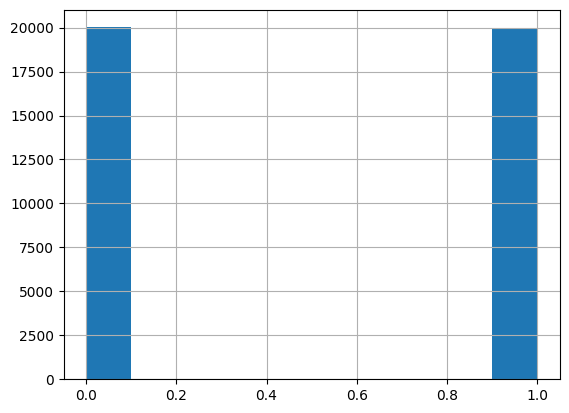

In [23]:
movie['label'].hist()


In [24]:
lableled_marks,unlableled_marks = train_test_split(movie, train_size=0.2, random_state=56)


In [25]:
lableled_marks.head()


text  label
13214  Glenn Close is back as Sarah Plain and Tall, a...      1
5520   Given that Dylan Thomas is an icon of modern A...      1
36048  Best-selling horror novelist Cheryl (a solid a...      1
12249  Was this meant to be a comedy or a serious dra...      0
39883  When you read the summary of this film, you mi...      1

In [26]:
unlableled_marks.head()


text  label
5203   A disappointing end to a season that started s...      0
29685  This cartoon was strange, but the story actual...      1
16969  I honestly want the last 30 minuets of my life...      0
17208  Check out the two octogenarians who review Lea...      0
30134  True stories make the best stories don't they?...      1

In [27]:
def train_model(labled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labled_data['text'])
    y = labled_data['label']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(lableled_marks)


In [30]:
x_unlableled = vect.transform(unlableled_marks['text'])
y_unlableled_predicted = model.predict(x_unlableled)


In [34]:
y_unlableled_proba = model.predict_proba(x_unlableled)
uncertainly = -(y_unlableled_proba * np.log2(y_unlableled_proba)).sum(axis=1)
uncertainly


array([0.94233476, 0.98926715, 0.76625023, ..., 0.40795339, 0.9121452 ,
       0.76279618])

In [43]:
lebeled_new = unlableled_marks.iloc[uncertainly.argsort()[:100]]
unlebeled_new = unlableled_marks.iloc[uncertainly.argsort()[100:]]


In [42]:
lebeled_new


text  label
21449  Terrible acting, lame plot, stupid story and j...      0
27881  I would have given it a one instead of a two, ...      0
7604   This is just the same old crap that is spewed ...      0
4003   I rented this movie today... worst movie EVER....      0
2825   I can't believe it that was the worst movie i ...      0
...                                                  ...    ...
38522  First of all, let me say that this is not the ...      0
32879  In The White Balloon and Crimson Gold, the two...      1
309    For anyone who may not know what a one-actor m...      1
88     While the overall idea of Escape from Atlantis...      0
25648  That's right! Under 9 on average, but maybe un...      0

[31900 rows x 2 columns]

In [40]:
unlebeled_new


text  label
32209  I don't really know where to start. The acting...      0
18198  This movie wasn't just bad - it was terrible. ...      0
21574  This is an Excellent little movie! The acting ...      1
12660  This film is in a dead tie with the original f...      0
18185  This is crap....utter crap. I cannot believe a...      0
...                                                  ...    ...
27346  It's important to keep in mind the real meanin...      0
33035  Although the beginning of the movie in New Yor...      1
34952  I would probably say this was on a par with fi...      1
25675  I work in a library and expected to like this ...      1
2672   Every American who thinks he or she understand...      1

[31900 rows x 2 columns]

In [45]:
lebeled_marks = pd.concat([lebeled_new, unlebeled_new])
lebeled_marks


text  label
21449  Terrible acting, lame plot, stupid story and j...      0
27881  I would have given it a one instead of a two, ...      0
7604   This is just the same old crap that is spewed ...      0
4003   I rented this movie today... worst movie EVER....      0
2825   I can't believe it that was the worst movie i ...      0
...                                                  ...    ...
27346  It's important to keep in mind the real meanin...      0
33035  Although the beginning of the movie in New Yor...      1
34952  I would probably say this was on a par with fi...      1
25675  I work in a library and expected to like this ...      1
2672   Every American who thinks he or she understand...      1

[32000 rows x 2 columns]

In [46]:
model, vectorized = train_model(lebeled_marks)


In [47]:
marks_test = unlableled_marks
marks_test


text  label
5203   A disappointing end to a season that started s...      0
29685  This cartoon was strange, but the story actual...      1
16969  I honestly want the last 30 minuets of my life...      0
17208  Check out the two octogenarians who review Lea...      0
30134  True stories make the best stories don't they?...      1
...                                                  ...    ...
28116  I'm the first to recognize that Chan-wook Park...      1
14947  "Whipped" is 82 minutes long. This review is 8...      0
34101  My qualifications for this review? I own all t...      0
15492  I laughed my ass off for an hour. I had no ide...      1
20852  This is a very intriguing short movie by David...      1

[32000 rows x 2 columns]

In [49]:
x_test = vect.fit_transform(marks_test["text"])
y_test = model.predict(x_test)


In [ ]:
f1 = f1_score
